### **Importing Required Libraries**

In [34]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
# Importing libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### **Loading the Dataset**

In [35]:
# Loading the dataset
df = pd.read_csv('./Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [36]:
# Lets check the first five rows of data
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [37]:
# Shape
df.shape

(1000, 2)

In [38]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

**data is equally distributed between liked and disliked**

### **EDA**

In [39]:
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

#### Let's see the most used words in positive reviews!

In [40]:
positive_reviews = df[df["Liked"] == 1]

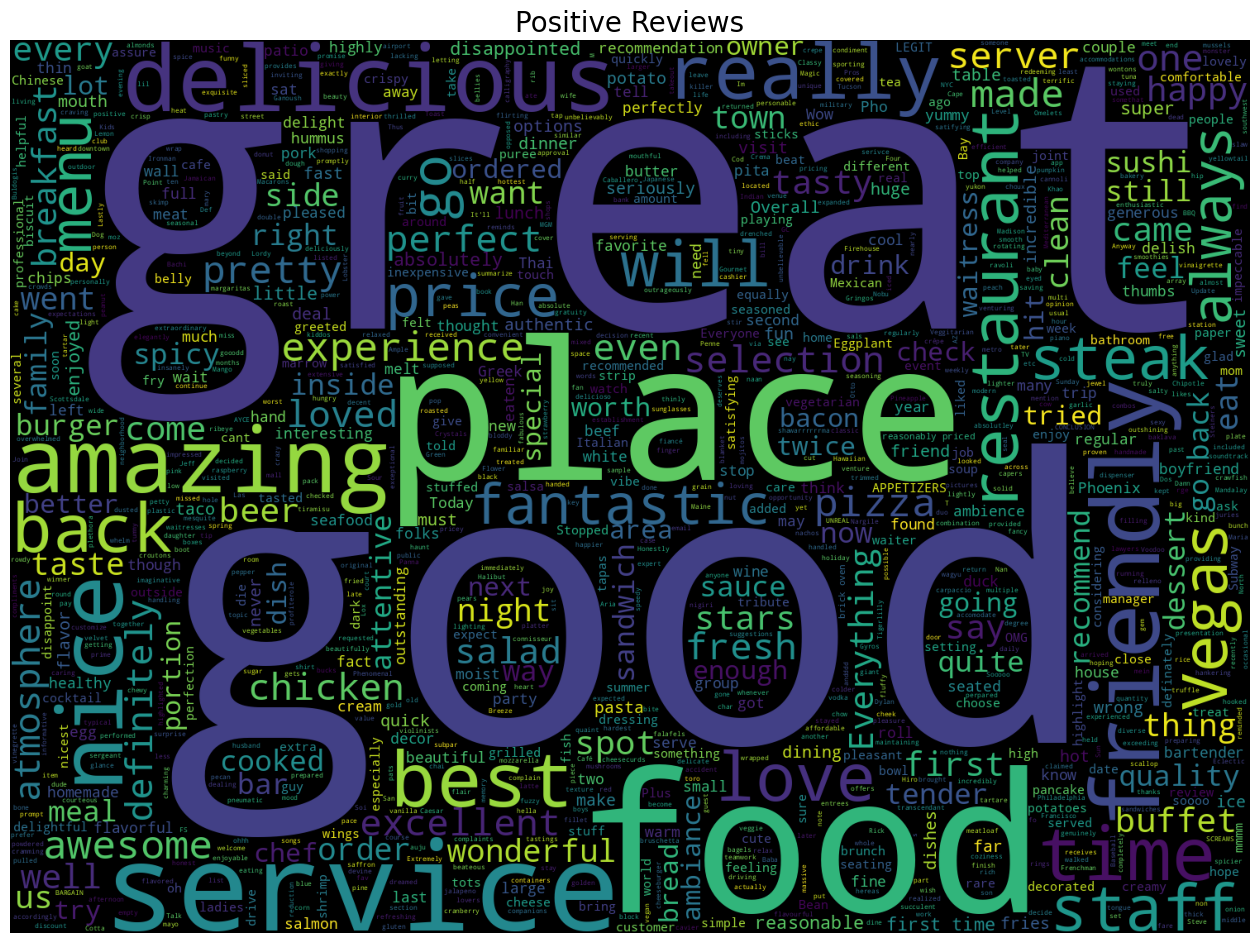

In [41]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(positive_reviews.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

#### Now Let's see the most used words in negative reviews!

In [42]:
negative_reviews = df[df["Liked"] == 0]

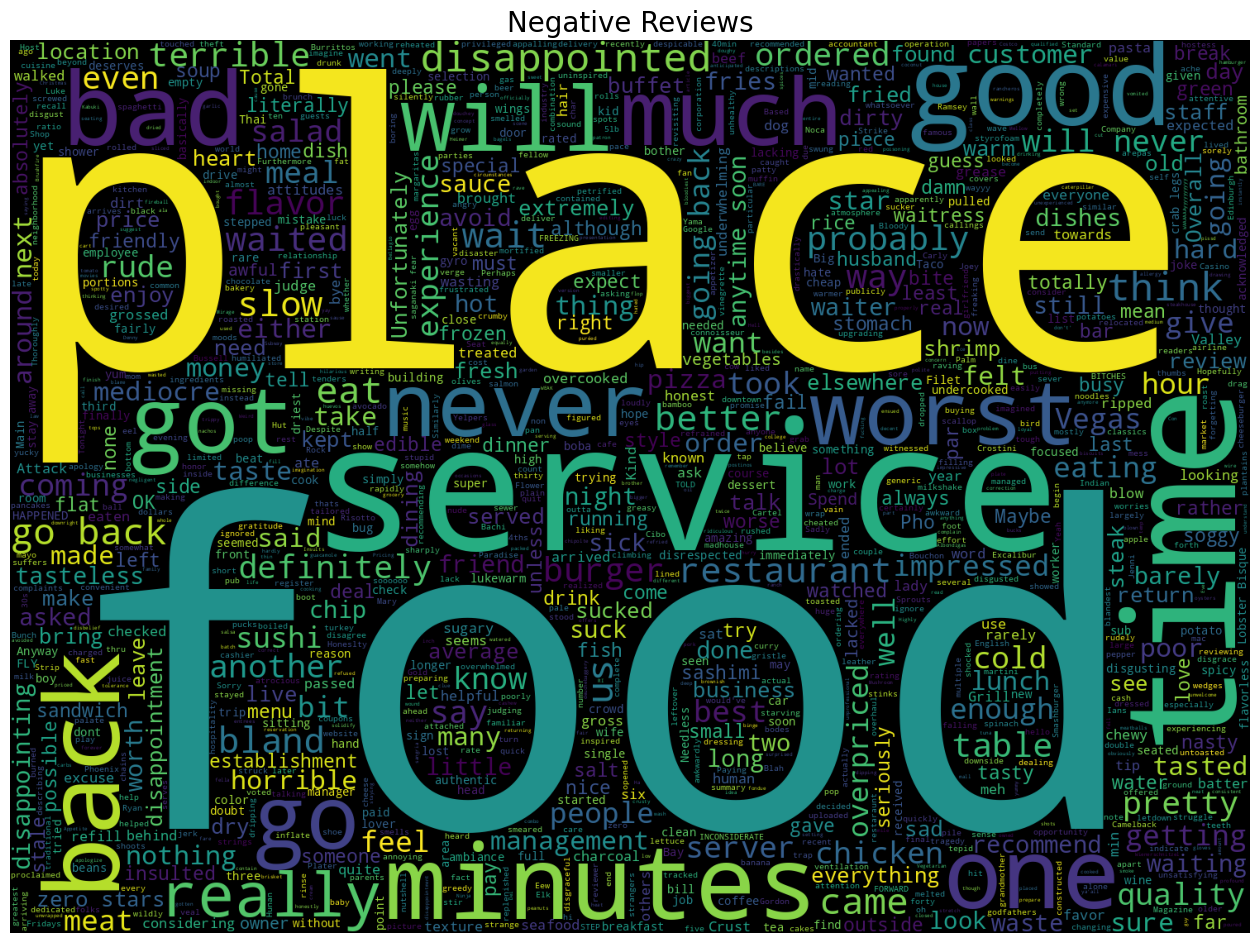

In [43]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(negative_reviews.Review))
plt.title("Negative Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Data Preprocessing**

In [45]:
# Here we get the length of each review
df['Length']= df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [46]:
# Cleaning the reviews
corpus = []
ps = PorterStemmer()
for i in range(0,len(df)):


    # Cleaning special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

    # Converting the entire review into lower case
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

    # Stemming the words
    review = [ps.stem(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)

In [47]:
# lets check the corpus
corpus[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### **Bag of Words**

In [48]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.loc[:, 'Liked'].values

### **Model Building**

**Train-Test Split**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [50]:
# Model building function
def Model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model,accuracy

In [51]:
result = pd.DataFrame(columns = ["Model", "Accuracy"])

models = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(n_estimators=1000),
                      KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB(), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models:
    clf, accuracy = Model(model)
    result = result.append({"Model": model, "Accuracy": accuracy}, ignore_index=True)

result

,Model,Accuracy
0,DecisionTreeClassifier(),0.640
1,LogisticRegression(),0.765
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.700
3,KNeighborsClassifier(n_neighbors=7),0.650
4,SVC(),0.765
5,GaussianNB(),0.690
6,"XGBClassifier(base_score=None, booster=None, c...",0.745


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py", line 1870, in safe_sort
    sorter = values.argsort()
TypeError: '<' not supported between instances of 'LogisticRegression' and 'DecisionTreeClassifier'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2764, in user_expressions
    value = self._format_user_obj(eval(expr, global_ns, user_ns))
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.10/dist-packages/google/colab/output/_js.py", line 97, in _invoke_function
    return callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_hint_button.py", line 193, in _suggest_charts
    for chart_section in _quickchart.find_charts(
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart.py", line 79, in find_char

**Logistic Regression and SVM performed better here.**

In [52]:
# Fitting svm to the Training set
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

### **Prediction**

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

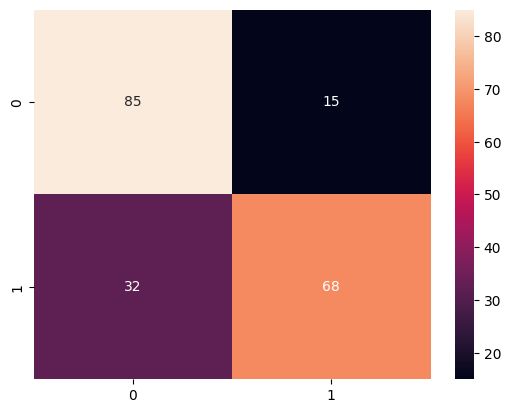

In [54]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

### Tuning the hyper-parameters of SVM

In [55]:
# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [56]:
# Find the optimal parameters
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [57]:
# Find the best score
print(grid.best_score_)

0.7737499999999999


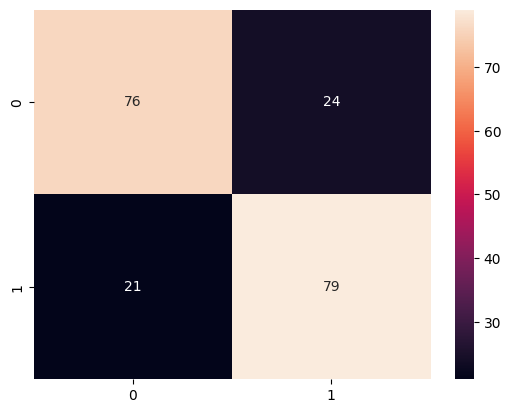

In [58]:
pred = grid.predict(X_test)
# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1,annot=True)
plt.show()

In [59]:
# Helper Function for prediction
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return grid.predict(temp)

In [60]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [61]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [62]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [63]:
# Predicting values
sample_review = 'The food was disastrous.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [64]:
# Creating a pickle file for the CountVectorizer
import pickle
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [65]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'restaurant-sentiment-mnb-model.pkl'
pickle.dump(grid, open(filename, 'wb'))